In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def getDf():
    files = {}
    for size in [1000000, 1500000, 10000000, 15000000]:
        with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'accesstime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        dfs[k] = df
    df = dfs['size1000000']
    for s in [1500000, 10000000, 15000000]:
        df = pd.concat([df, dfs["size{}".format(s)]])
        
    df.astype({ "size": "int32", "inittime": "int32", \
                "addtime": "int32", 'accesstime': "int32","totaltime": "int32",
              "method": 'category', "type": 'category'})
    return df

In [105]:
df = getDf()

In [112]:
df_average = df.groupby(["method", "type", "size"]).mean().reset_index()

In [113]:
df_average

,method,type,size,inittime,addtime,accesstime,totaltime
0,"""clone""","""Integer""",1000000,6387.1,2.609672e+06,8.827557e+07,2.348939e+08
1,"""clone""","""Integer""",1500000,6384.7,3.930114e+06,1.332440e+08,3.537964e+08
2,"""clone""","""Integer""",10000000,7249.6,2.430269e+07,8.789176e+08,2.333875e+09
3,"""clone""","""Integer""",15000000,7589.6,3.671440e+07,1.322958e+09,3.505618e+09
4,"""clone""","""String""",1000000,5932.1,1.054294e+08,9.707968e+07,5.271995e+09
5,"""clone""","""String""",1500000,5887.6,1.582823e+08,1.452473e+08,7.911234e+09
6,"""clone""","""String""",10000000,6091.1,1.070384e+09,9.675927e+08,5.262766e+10
7,"""clone""","""String""",15000000,6591.8,1.612410e+09,1.454449e+09,7.901170e+10
8,"""clone_from""","""Integer""",1000000,6216.4,2.530028e+06,8.748677e+07,2.333370e+08
9,"""clone_from""","""Integer""",1500000,6362.9,3.820881e+06,1.321444e+08,3.509415e+08


In [114]:
df_avg_int = df_average[df_average["type"] == '"Integer"']

In [115]:
df_avg_int

,method,type,size,inittime,addtime,accesstime,totaltime
0,"""clone""","""Integer""",1000000,6387.1,2.609672e+06,8.827557e+07,2.348939e+08
1,"""clone""","""Integer""",1500000,6384.7,3.930114e+06,1.332440e+08,3.537964e+08
2,"""clone""","""Integer""",10000000,7249.6,2.430269e+07,8.789176e+08,2.333875e+09
3,"""clone""","""Integer""",15000000,7589.6,3.671440e+07,1.322958e+09,3.505618e+09
8,"""clone_from""","""Integer""",1000000,6216.4,2.530028e+06,8.748677e+07,2.333370e+08
9,"""clone_from""","""Integer""",1500000,6362.9,3.820881e+06,1.321444e+08,3.509415e+08
10,"""clone_from""","""Integer""",10000000,6599.0,2.450020e+07,8.794625e+08,2.338011e+09
11,"""clone_from""","""Integer""",15000000,6557.2,3.657789e+07,1.319785e+09,3.503204e+09
16,"""memcpy""","""Integer""",1000000,6741.4,2.581597e+06,8.778601e+07,2.340466e+08
17,"""memcpy""","""Integer""",1500000,6317.0,3.823489e+06,1.320966e+08,3.510840e+08


In [116]:
df_avg_string = df_average[df_average["type"] == '"String"']

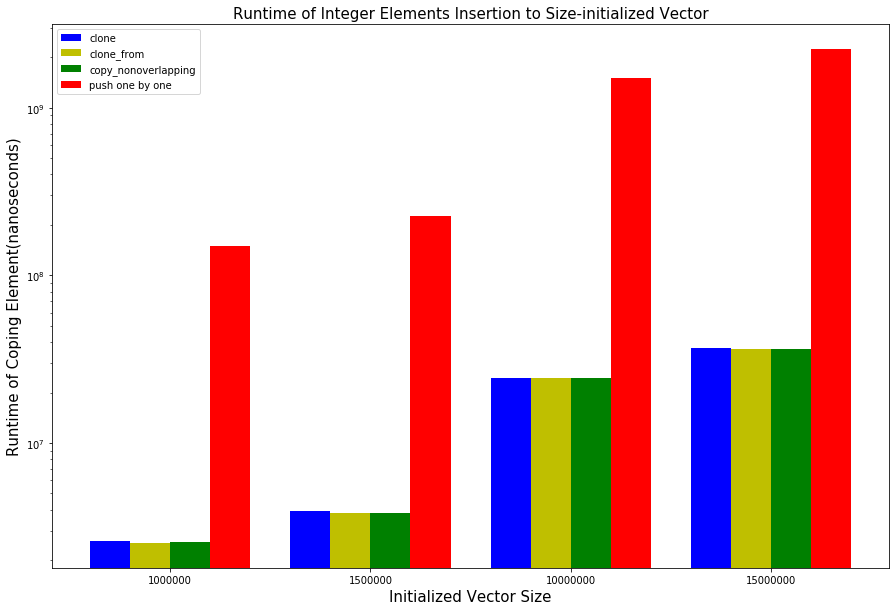

In [117]:
clone = df_avg_int[df_avg_int["method"] == '"clone"']
clone_from = df_avg_int[df_avg_int["method"] == '"clone_from"']
memcpy = df_avg_int[df_avg_int["method"] == '"memcpy"']
onebyone = df_avg_int[df_avg_int["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
label = np.sort(df_avg_int['size'].unique())
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
#fig.savefig("rust_various_insertion_integer.eps")
plt.show()

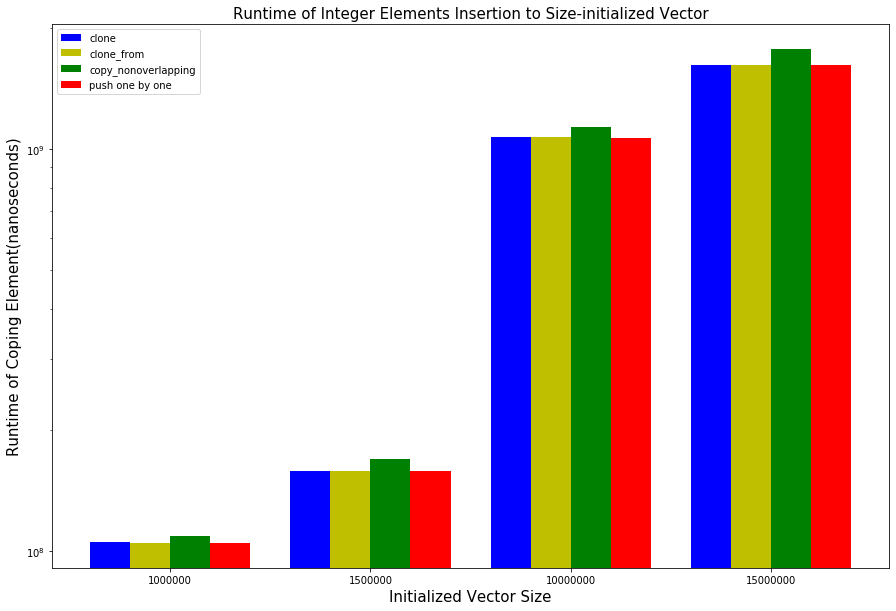

In [118]:
clone = df_avg_string[df_avg_string["method"] == '"clone"']
clone_from = df_avg_string[df_avg_string["method"] == '"clone_from"']
memcpy = df_avg_string[df_avg_string["method"] == '"memcpy"']
onebyone = df_avg_string[df_avg_string["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
#fig.savefig("rust_various_insertion_string.eps")
plt.show()